# Heart Disease Prediction

In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [58]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [59]:
df.drop(columns=['education'],inplace=True,axis = 1)
df.rename(columns={'male':'Sex_male'},inplace=True)

In [60]:
df.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [61]:
df.dropna(axis = 0 , inplace=True)
df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [62]:
print(df.TenYearCHD.value_counts())

0    3179
1     572
Name: TenYearCHD, dtype: int64


In [63]:
X = np.array(df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose']])

y = np.array(df['TenYearCHD'])


model = StandardScaler()
model.fit_transform(X)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print("Train Set : ", X_train.shape , y_train.shape)
print("Test Set : " , X_test.shape , y_test.shape)

Train Set :  (2625, 6) (2625,)
Test Set :  (1126, 6) (1126,)


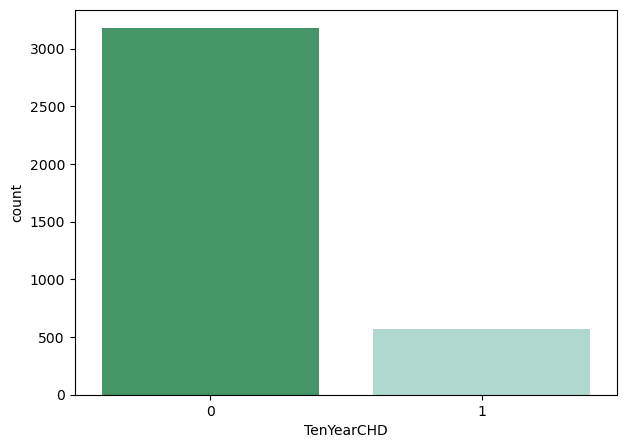

In [64]:
plt.figure(figsize=(7,5))
sns.countplot(x='TenYearCHD' , data = df,palette='BuGn_r')
plt.show()

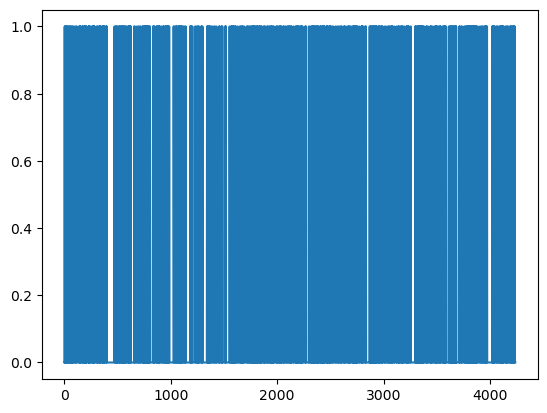

In [65]:
laste = df['TenYearCHD'].plot()
plt.show(laste)

In [66]:
reg = LogisticRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [69]:
acc = accuracy_score(y_pred,y_test)
print(f"Accuracy Score : {acc:.2f}" )

Accuracy Score : 0.83


The details for confusion matrix is = 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       938
           1       0.52      0.06      0.11       188

    accuracy                           0.83      1126
   macro avg       0.68      0.52      0.51      1126
weighted avg       0.79      0.83      0.77      1126

[[928  10]
 [177  11]]


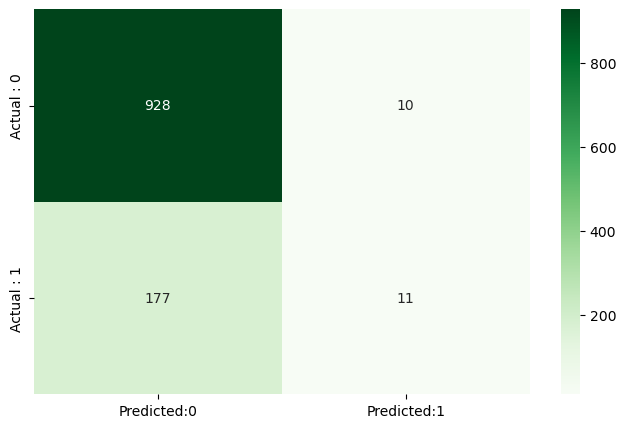

In [75]:
from sklearn.metrics import confusion_matrix,classification_report


print('The details for confusion matrix is = ')
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
print(cm)
conf_matrix = pd.DataFrame(data = cm , columns=['Predicted:0', 'Predicted:1'] , index = ['Actual : 0', 'Actual : 1'])

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt = 'd',cmap = 'Greens')
plt.show()
